In [65]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import random
random.seed(42)

# 1. Data Preprocessing

## Data Import

In [66]:
df = pd.read_csv(r"C:\Users\johns\OneDrive\Desktop\MBAN Semester 2\Data Science 2\datasets\Customer_Data.csv")

## Data Overview

CUSTID: This is the identification number assigned to each Credit Cardholder. It is a categorical variable.

BALANCE: This refers to the remaining balance in the cardholder's account that can be used for making purchases.

BALANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently the balance is updated. A score of 1 means the balance is frequently updated while a score of 0 indicates infrequent updates.

PURCHASES: This is the total amount of purchases made from the account.

ONEOFFPURCHASES: Maximum amount of purchase made in a single transaction.

INSTALLMENTSPURCHASES: This indicates the number of purchases made in installments.

CASH ADVANCE: This is the amount of cash in advance given by the user.

PURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases are made from the account. A score of 1 means frequent purchases while a score of 0 indicates infrequent purchases.

ONEOFFPURCHASESFREQUENCY: This is a score between 0 and 1 that indicates how frequently one-off purchases are made. A score of 1 means frequent one-off purchases while a score of 0 indicates infrequent one-off purchases.

PURCHASES INSTALLMENTS FREQUENCY: This is a score between 0 and 1 that indicates how frequently purchases in installments are made. A score of 1 means frequent installment purchases while a score of 0 indicates infrequent installment purchases.

CASHADVANCEFREQUENCY: This is a score between 0 and 1 that indicates how frequently cash in advance is being paid back.

CASHADVANCETRX: This refers to the number of transactions made with "Cash in Advance".

PURCHASESTRX: This is the number of purchase transactions made.

CREDIT LIMIT: This is the credit limit assigned to the user's Credit Card.

PAYMENTS: This is the total amount of payment made by the user.

MINIMUM_PAYMENTS: This is the minimum amount of payment made by the user.

PRCFULLPAYMENT: This indicates the percentage of full payment made by the user.

TENURE: This is the tenure of the credit card service for the user.

In [67]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [68]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Cleaning

In [70]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We will remove the null values from the CREDIT_LIMIT and MINIMUM_PAYMETS columns

In [71]:
df.dropna(inplace= True, axis=0)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

This only removes 314 values from the dataset and we are still left with 8636 non null values for each variable

## Univariate Analysis

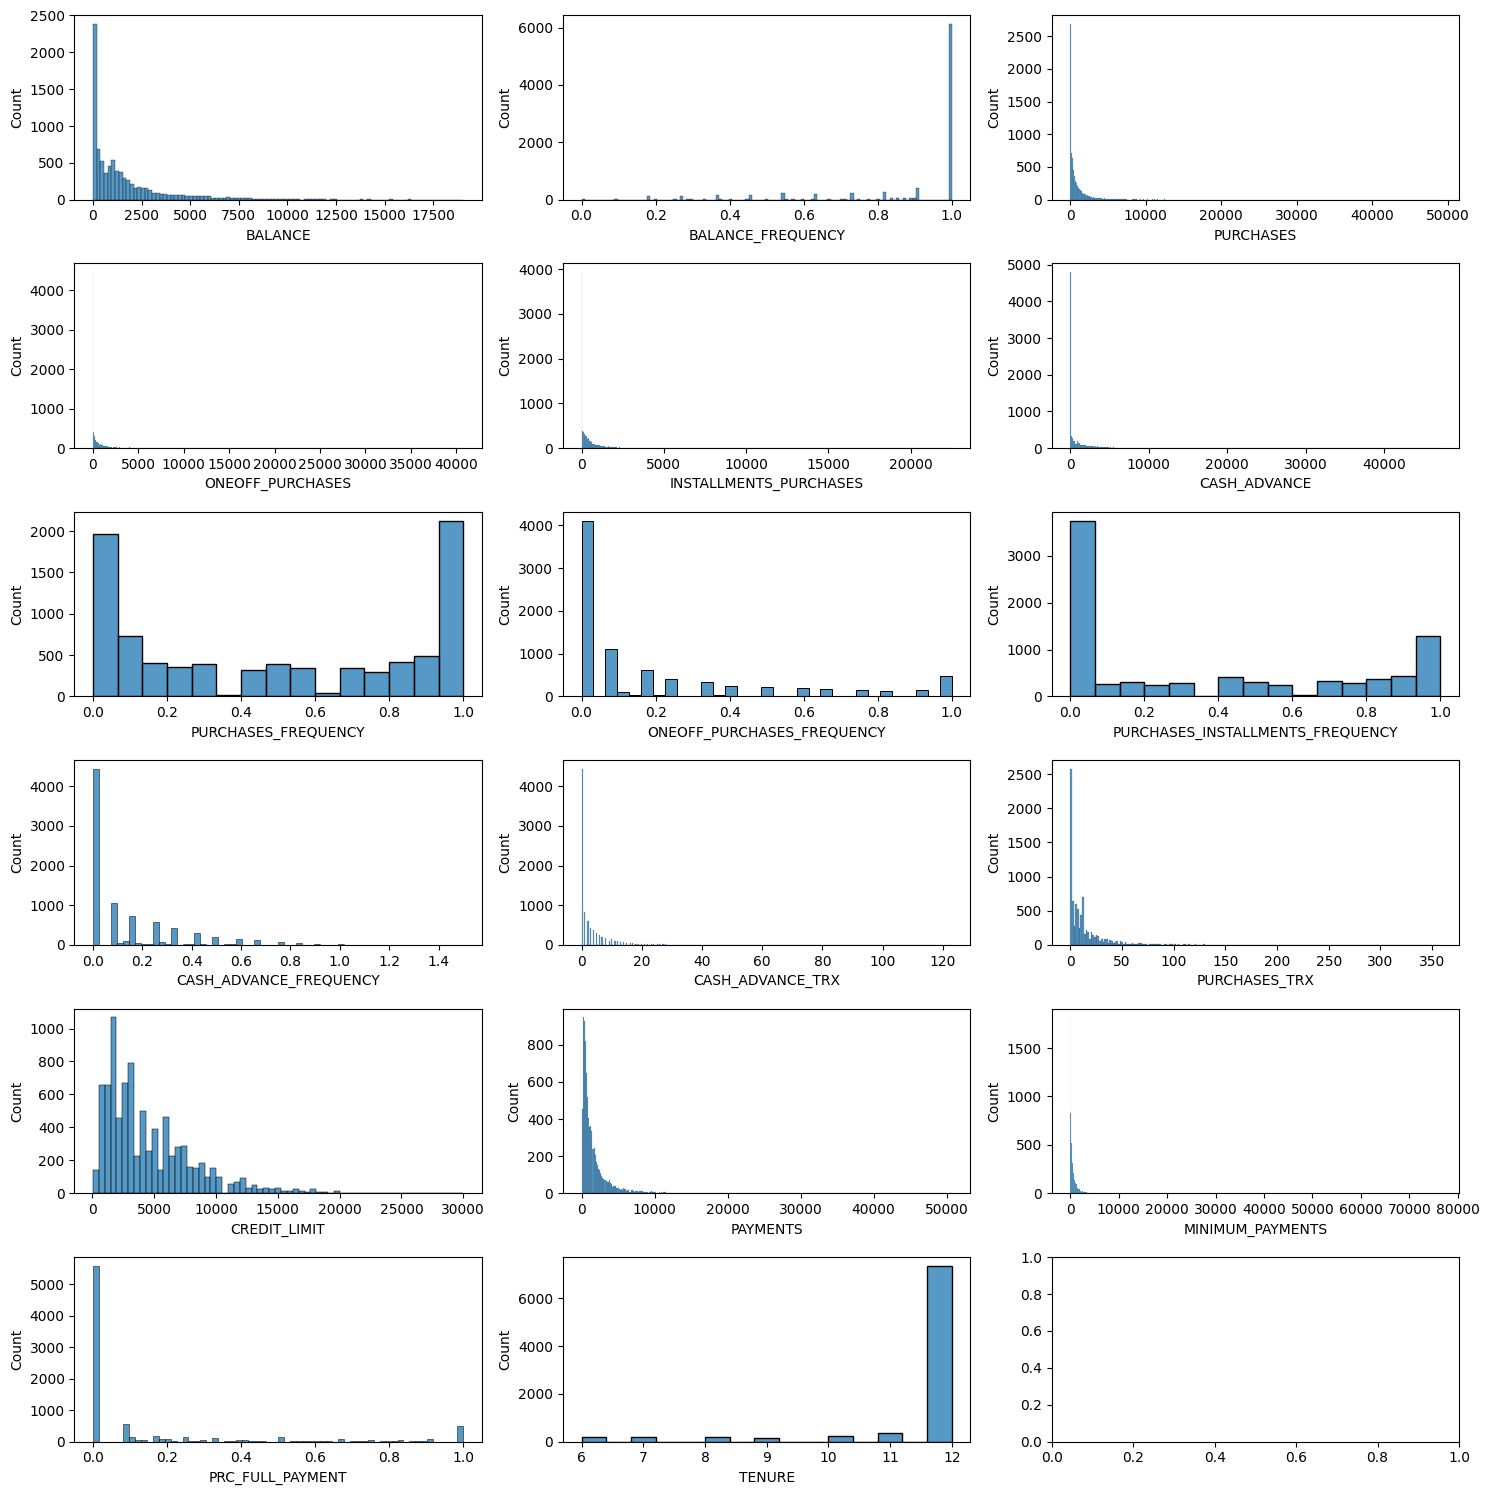

In [73]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, _)) = plt.subplots(6, 3, figsize=(15, 15))

sns.histplot(x=df['BALANCE'], ax=ax1)
sns.histplot(x=df['BALANCE_FREQUENCY'], ax=ax2)
sns.histplot(x=df['PURCHASES'], ax=ax3)
sns.histplot(x=df['ONEOFF_PURCHASES'], ax=ax4)
sns.histplot(x=df['INSTALLMENTS_PURCHASES'], ax=ax5)
sns.histplot(x=df['CASH_ADVANCE'], ax=ax6) 
sns.histplot(x=df['PURCHASES_FREQUENCY'], ax=ax7)
sns.histplot(x=df['ONEOFF_PURCHASES_FREQUENCY'], ax=ax8)
sns.histplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=ax9) 
sns.histplot(x=df['CASH_ADVANCE_FREQUENCY'], ax=ax10)
sns.histplot(x=df['CASH_ADVANCE_TRX'], ax=ax11)
sns.histplot(x=df['PURCHASES_TRX'], ax=ax12) 
sns.histplot(x=df['CREDIT_LIMIT'], ax=ax13)
sns.histplot(x=df['PAYMENTS'], ax=ax14) 
sns.histplot(x=df['MINIMUM_PAYMENTS'], ax=ax15)
sns.histplot(x=df['PRC_FULL_PAYMENT'], ax=ax16)
sns.histplot(x=df['TENURE'], ax=ax17) 

plt.tight_layout()
plt.show()

Balance: Most balances are around 0 and this quickly drops off. The higher the balance the lower the amount of people.

Balance Frequency: Most of the balances are updated frequently.

Purchases: In most cases very few purchases are made.

Oneoff Purchases: In most cases very few one off purchases are made.

Installments Purchases: In most cases very few installment purchases are made.

Cash Advance: very few customers give cash in advance.

Purchases Frequency: a score of 0 or one are most common meaning most people either make a lot of purchases or none. 

Oneoff Purchases Frequency: a score of 0 is most common meaning one off purchases are not very popular.

Purchases Installments Frequency: Installments are more popular than oneoff purchases as the value for 1 and many of the values in between are larger.

Cash Advance Freqeuency: Cash in advance is not being paid back very often. 

Cash Advance TRX: Not many purchases are made with cash in advance. 

Purchases TRX: 0 is the largest column but there is an interesting bump around 20 for purchase transactions.

Credit Limit: Credit limit most commonly seems to sit around 1000 which may be what is giving to new users. there are many people within 1000 or so from the 1000 but after that there is a decently large drop off.

Payments: The most common number of payments seems to be between 0 and 1000 and looks to peak around 200.

Minimum Payments: 0 is the most common value for the minimum amount of payment made by the user.

PRC Full Payment: 0% is once again the most common value but there is a decent bimp around 10% and 100%.

Tenure: 12 is the most common value for tenure and most other values are fairly even. 

NOTE: Based on the look of most of the graphs as well there are outlier values as the graphs continue on despite not being any visible values. These graphs would include purchases, one off purchases, installments puRchases, cash advance, cash advance trx, purchases trx, payments, and minimum payments

In [74]:
df[df['PURCHASES'] > 15000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.344320,1971.129435,0.083333,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12
507,C10529,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.276620,534.032339,1.000000,12
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.598240,2974.069421,0.250000,12
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.007520,537.372671,1.000000,12
941,C10975,2072.457624,1.000000,17409.21,11263.17,6146.04,0.000000,1.000000,1.000000,1.000000,0.000000,0,175,19500.0,19517.161600,517.324081,0.333333,12
970,C11004,3108.393701,0.900000,26582.34,15158.90,11423.44,0.000000,0.900000,0.800000,0.800000,0.000000,0,55,28000.0,26557.097240,586.029097,0.875000,10
1190,C11234,1893.611922,1.000000,22746.81,15795.42,6951.39,0.000000,1.000000,1.000000,1.000000,0.000000,0,140,18000.0,22558.284570,505.125031,1.000000,12
1256,C11300,4010.621974,1.000000,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12


In [75]:
df[df['ONEOFF_PURCHASES'] > 10000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.344320,1971.129435,0.083333,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,12
507,C10529,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.276620,534.032339,1.000000,12
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.598240,2974.069421,0.250000,12
563,C10587,1202.975648,1.000000,11313.77,10133.70,1180.07,0.000000,1.000000,1.000000,0.833333,0.000000,0,98,6000.0,10718.042240,281.611634,0.833333,12
574,C10598,3452.538704,1.000000,11681.64,11681.64,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,141,10500.0,8145.713972,1198.614519,0.000000,12
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.007520,537.372671,1.000000,12
624,C10649,3123.339488,1.000000,11202.09,10929.53,272.56,0.000000,1.000000,1.000000,0.583333,0.000000,0,100,7500.0,8317.163283,887.495688,0.083333,12
652,C10678,7760.525400,1.000000,14332.92,10588.97,3743.95,0.000000,1.000000,0.909091,0.909091,0.000000,0,152,16000.0,7116.531862,2117.186083,0.000000,11


In [76]:
df[df['INSTALLMENTS_PURCHASES'] > 5000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
122,C10127,2114.158683,1.000000,5580.85,0.00,5580.85,0.000000,1.000000,0.000000,1.000000,0.000000,0,75,8500.0,3564.977774,630.004130,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
153,C10159,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
220,C10229,9047.621884,1.000000,11188.62,6099.16,5089.46,0.000000,1.000000,0.750000,1.000000,0.000000,0,151,10000.0,11994.418150,8517.258683,0.000000,12
229,C10238,2723.369217,0.909091,10410.49,1158.84,9251.65,0.000000,0.750000,0.666667,0.583333,0.000000,0,41,19500.0,9695.650901,726.696049,0.363636,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.344320,1971.129435,0.083333,12
393,C10407,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,11000.0,7932.774020,17494.907350,0.000000,12
511,C10534,2549.128288,1.000000,13771.63,4503.31,9268.32,0.000000,1.000000,0.500000,1.000000,0.000000,0,83,14500.0,16826.424430,451.636081,0.250000,12
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.598240,2974.069421,0.250000,12
560,C10584,1311.732049,1.000000,10700.63,2912.65,7787.98,0.000000,0.916667,0.500000,1.000000,0.000000,0,222,6000.0,9853.313787,280.014823,0.818182,12


In [77]:
df[df['CASH_ADVANCE'] > 10000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.48576,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
133,C10139,9354.060450,1.000000,796.33,796.33,0.00,13748.47131,0.083333,0.083333,0.000000,0.666667,16,1,13000.0,10664.658660,2600.875721,0.083333,12
182,C10188,2881.253586,1.000000,117.00,0.00,117.00,17661.49486,0.250000,0.000000,0.166667,0.750000,28,3,4500.0,17301.832380,931.618475,0.166667,12
248,C10257,9612.215120,1.000000,319.92,0.00,319.92,13439.57040,1.000000,0.000000,1.000000,0.416667,12,12,12000.0,10993.892110,2501.560923,0.000000,12
274,C10285,5265.763713,1.000000,410.24,44.71,365.53,15452.97758,0.916667,0.083333,0.916667,0.333333,13,21,16500.0,12005.307400,1055.547896,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,C18458,2144.040539,1.000000,0.00,0.00,0.00,14127.46664,0.000000,0.000000,0.000000,0.416667,23,0,3500.0,12571.814660,525.168936,0.300000,12
8315,C18536,2648.244646,1.000000,0.00,0.00,0.00,10458.97815,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12
8422,C18648,3911.628474,0.875000,0.00,0.00,0.00,11951.90332,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8
8705,C18942,7302.672686,1.000000,0.00,0.00,0.00,10762.70776,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12


In [78]:
df[df['CASH_ADVANCE_TRX'] > 40]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
542,C10566,1284.633140,1.000000,55.50,0.00,55.50,5406.459348,0.083333,0.000000,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.000000,12
557,C10581,5404.202992,1.000000,469.00,286.00,183.00,8005.225080,0.666667,0.166667,0.333333,0.833333,52,4,7000.0,2676.467444,1468.475204,0.000000,6
610,C10635,7155.328723,1.000000,3837.59,1860.18,1977.41,14811.688180,1.000000,0.916667,1.000000,0.916667,51,52,9500.0,17739.945940,2500.582848,0.000000,12
615,C10640,8900.194109,1.000000,0.00,0.00,0.00,4849.693752,0.000000,0.000000,0.000000,0.916667,52,0,12000.0,2430.864139,2452.882838,0.000000,12
658,C10684,3808.073463,0.909091,6030.34,2874.89,3155.45,7279.880364,1.000000,0.500000,1.000000,0.500000,62,104,7000.0,17084.851920,2068.252050,0.090909,12
735,C10762,7715.659048,1.000000,0.00,0.00,0.00,6182.982033,0.000000,0.000000,0.000000,1.000000,62,0,11500.0,1777.003806,2412.544026,0.000000,12
1217,C11261,1592.168416,1.000000,0.00,0.00,0.00,15084.008520,0.000000,0.000000,0.000000,0.333333,53,0,4500.0,11382.365800,472.703236,0.166667,12
1487,C11538,5868.206909,1.000000,911.56,683.00,228.56,5761.320083,0.833333,0.666667,0.750000,0.833333,45,45,9000.0,1068.212206,1894.826566,0.000000,12
1710,C11766,7445.228843,1.000000,1023.29,0.00,1023.29,16323.642430,1.000000,0.000000,1.000000,0.833333,43,31,11500.0,11320.007460,2739.343539,0.083333,12
1778,C11838,6836.552992,1.000000,0.00,0.00,0.00,11405.734250,0.000000,0.000000,0.000000,1.000000,42,0,10000.0,6834.695342,2716.326216,0.000000,12


In [79]:
df[df['PURCHASES_TRX'] > 200]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,C10131,2392.917738,1.0,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
153,C10159,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
415,C10430,681.615445,1.0,4117.24,290.00,3827.24,0.000000,1.000000,0.166667,1.000000,0.000000,0,229,6000.0,4561.589382,199.730537,0.000000,12
560,C10584,1311.732049,1.0,10700.63,2912.65,7787.98,0.000000,0.916667,0.500000,1.000000,0.000000,0,222,6000.0,9853.313787,280.014823,0.818182,12
645,C10671,1482.235539,1.0,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.630560,340.717801,1.000000,12
1256,C11300,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.000000,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12
1412,C11458,972.665818,1.0,10549.19,9180.41,1368.78,0.000000,1.000000,1.000000,1.000000,0.000000,0,248,9000.0,10114.188540,209.881639,1.000000,12
1767,C11827,10822.058110,1.0,4850.35,2847.80,2002.55,0.000000,1.000000,0.916667,1.000000,0.000000,0,208,15500.0,2740.094420,2621.071099,0.000000,12
1912,C11974,5292.905315,1.0,5539.68,2603.79,2935.89,0.000000,1.000000,0.916667,1.000000,0.000000,0,273,6000.0,3597.677582,3838.484817,0.000000,12


In [80]:
df[df['PAYMENTS'] > 20000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
39,C10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.07544,719.948985,0.333333,12
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12
273,C10284,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12
341,C10352,1132.386178,0.454545,2246.30,2246.30,0.00,14048.071810,0.333333,0.333333,0.000000,0.416667,20,8,6000.0,32048.61220,406.790252,0.800000,12
501,C10523,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.75068,15914.484620,0.083333,12
507,C10529,2643.343414,1.000000,26402.39,22257.39,4145.00,0.000000,1.000000,1.000000,0.333333,0.000000,0,114,16500.0,24529.27662,534.032339,1.000000,12
550,C10574,11547.520010,1.000000,49039.57,40761.25,8278.32,558.166886,1.000000,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12
587,C10611,2492.726282,1.000000,27957.68,23032.97,4924.71,0.000000,1.000000,1.000000,0.916667,0.000000,0,70,9000.0,27255.00752,537.372671,1.000000,12
634,C10659,4925.502001,1.000000,3050.72,989.14,2061.58,10901.298270,0.583333,0.333333,0.333333,0.416667,24,16,11500.0,21320.89625,3913.712987,0.166667,12


In [81]:
df[df['MINIMUM_PAYMENTS'] > 10000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.54938,0.000000,12
20,C10021,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.29726,0.000000,12
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.55831,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.01331,0.000000,12
150,C10156,7679.629040,1.000000,4059.93,0.00,4059.93,555.469352,0.583333,0.000000,0.500000,0.166667,7,14,7000.0,3685.610620,12854.93970,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,C18472,2149.205166,0.909091,0.00,0.00,0.00,1114.317913,0.000000,0.000000,0.000000,0.181818,2,0,3000.0,3230.180347,12748.98306,0.000000,11
8274,C18495,1410.909779,1.000000,698.88,0.00,698.88,948.848018,1.000000,0.000000,1.000000,0.166667,8,12,1200.0,79.578186,11795.28096,0.083333,12
8470,C18700,2046.727519,0.818182,1369.72,422.44,947.28,1817.810563,0.750000,0.166667,0.666667,0.166667,4,17,2500.0,242.742734,10729.19416,0.000000,12
8688,C18925,2898.484109,1.000000,0.00,0.00,0.00,3021.097135,0.000000,0.000000,0.000000,0.272727,5,0,3000.0,230.794237,13916.08593,0.000000,11


## Bivariate Analysis